# Practical 1: Data analysis and solving equations in python 

In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [36]:
D = np.loadtxt('../SIR_density.csv', delimiter=',', skiprows=1)
depth = D[:,0]
density = D[:,1]

## 1. How many data points are there?
Use the 'shape' method to find the size of numpy array we just loaded that contains the density data.  

In [38]:
print(f"The number of data points in the dataset is {depth.shape[0]}.")

The number of data points in the dataset is 362.


## 2. How deep was the ice core? 
The last data point  is the deepest data point, which we will assume is the depth of the ice core:

In [40]:
print(f"The depth of the ice core is {depth[-1]} m.")

The depth of the ice core is 291.2 m.


## 3. What is the density at the surface? What is the density at 30 m? 
The first data point  is the density at the surface.

In [5]:
print(f"The density at the surface is {density[0]} kg/m^3.")

The density at the surface is 505.1646305 kg/m^3.


To compute the density at a depth of 30 m, we realize that there is no data point exactly at 30 m, we must estimate the answer.

We have to use interpolation. Numpy has a built in function to do this. 

In [6]:
depth_ref = 30
density_ref = np.interp(depth_ref, depth, density)
density_ref

699.6995053

## 4. Plot density against depth
There are two ways of using the package matplotlib to make plots. 

One is the so-called *implicit* way, using pyplot (which we imported as plt above). 

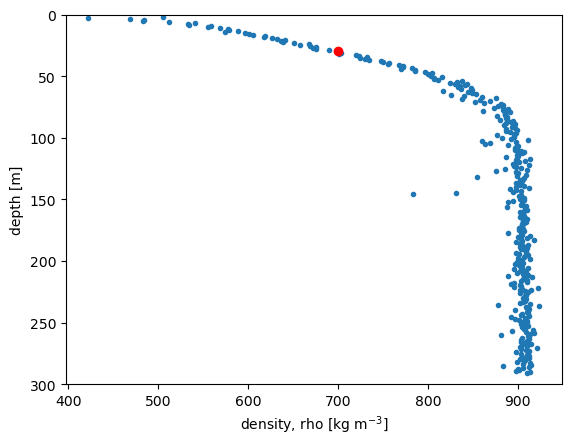

In [7]:
plt.plot(density,depth,'.');
plt.plot(density_ref,depth_ref,'ro');
plt.ylabel('depth [m]')
plt.xlabel('density, rho [kg m$^{-3}$]')
plt.ylim(300, 0);

...the other is the more flexible method of explicitly calling each plotting object and using its methods to draw the plots and change the plot's properties. 

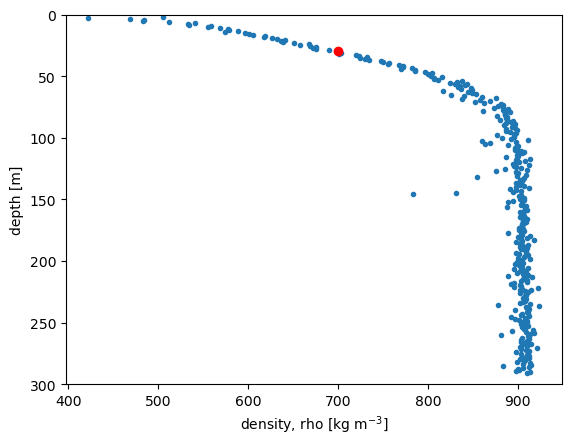

In [8]:
fig, ax = plt.subplots()
ax.plot(density,depth,'.')
ax.plot(density_ref,depth_ref,'or')
ax.set_xlabel('density, rho [kg m$^{-3}$]')
ax.set_ylabel('depth [m]')
ax.set_ylim(300, 0);

## 5. What is the average density in the top 50 m and in the bottom 200m?
For this, we will need to subset the data based on a condition (the depth being smaller or bigger than a number) and then take the average.

First, for each element of the `depth` array we ask is it smaller than 50m.
 we ask i

In [9]:
I = depth<50

This creates an array of 'boolean' values (i.e. true or false):

In [10]:
I

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

We can use this to 'index' the `density` array, which gives us just the elements of `density` that conrrespond to True values in the array `I`: 

In [11]:
density_top50 = density[I]
density_top50

array([505.1646305, 422.2508586, 468.5011014, 484.4254977, 483.124596 ,
       511.784361 , 540.6036147, 532.5673888, 534.6511122, 558.5907804,
       555.1254326, 569.0458324, 577.8736509, 578.0758759, 588.6216642,
       574.7019097, 596.5701813, 601.0644957, 605.6594631, 618.4762647,
       618.0933933, 626.9984246, 632.2116909, 640.6808355, 636.0880502,
       639.0167474, 651.2272585, 667.7799857, 657.2568736, 668.5408043,
       675.8183525, 672.4575202, 675.6296366, 689.9629592, 700.3215218,
       699.0774888, 703.1887512, 700.7435541, 719.7047824, 722.9700022,
       732.5485036, 724.6613437, 729.4061629, 734.3926351, 748.213836 ,
       749.6414505, 756.19855  , 755.8511029, 767.6658964, 771.987681 ,
       772.6588806, 782.6617137, 769.430549 , 785.0030877, 785.3345224,
       797.0850121, 803.9437911, 800.5132483, 802.227496 , 802.8706877])

Then we use a numpy built-in method to compute the mean of this subset of the `density` array:

In [12]:
density_meantop50 = density_top50.mean()
density_meantop50 = density_top50.mean()

This can be combined into one line as follows 

In [13]:
density_meantop50 = density[depth<50].mean()
density_meantop50

661.2823915916666

We use almost the same approach to compute the mean density in the bottom 200 m.

In [14]:
density_meanbottom200 = density[depth>(depth[-1]-200)].mean()
density_meanbottom200

902.3162571262949

## 6. Compute and plot pressure as a function of depth P(z).

To compute the pressue we will integrate the pressure equation:

$$
\frac{dP}{dz} = \rho(z) g
$$

where $P$ is the pressure, $\rho$ is the depth-dependent density, $z$ is the depth and $g$ is the acceleration due to gravity. 

To integrate this expression we use the simplest approach possible and simply progressively add up the contributions to the pressure from each little section, starting from the top and working our way down to the bottom. 

We make the following approximation, which is called finite-difference approximation: we replace the derivative a follows:

$$
\frac{dP}{dz} = \frac{P^{i+1} - P^i}{\delta z}
$$

This assumes that the variaton in $P$ between each data point is linear. 

We then use this with the expression above to get

$$
\frac{P^{i+1} - P^i}{\delta z} =\rho(z) g, 
$$

where the superscript $i$ indicates which data point we are considering. We can rearrange this to get 

$$
P^{i+1} = P^i + \delta z \rho^i g.
$$

With this expression, if we know  $P^i$ and $\rho^i$ we can get the pressure at the next data point $P^{i+1}$.

In the following code we do this in a loop, progressively computing the pressure at the next data point and then using that to compute the pressure at the next grid point, as so on, until we march through the whole data set. 


In [41]:
P = 0*depth   # define an array of zeros equal in length to z

g=10          # acceleration due to gravity [m s^-2]

dz = np.diff(depth)   # the spacing between grid points (in our case this is actually also a function of z)

P[0]= 0    # the boundary condition (note we could miss this out as we already initalized P as an array of zeros. 

for index in np.arange(start = 1, stop = len(P)):  # loop over the column of ice. 
    P[index] = P[index-1] + dz[index-1]*density[index-1]*g;

This should have computed the pressure as a function of depth. Let's plot this out and also add the pressure ina snowball (Q7). 

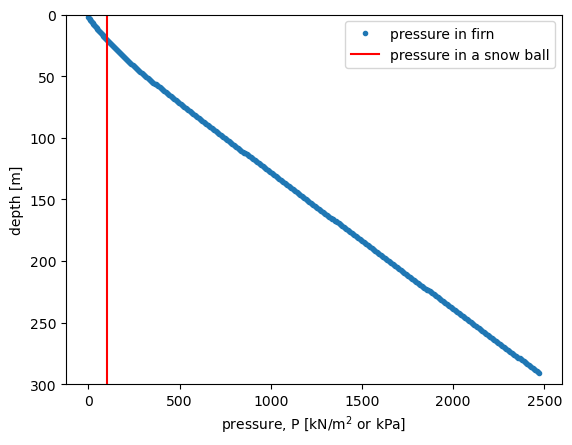

In [42]:
plt.plot(P/1e3,depth,'.', label = 'pressure in firn');
plt.plot([100, 100],[0,300],'r', label = 'pressure in a snow ball');
plt.ylabel('depth [m]')
plt.xlabel('pressure, P [kN/m$^2$ or kPa]')
plt.ylim(300, 0);
plt.legend();

## 8. How inaccurate is the approximation of rho = rho_i? 

In [17]:
rho_i = 981
P_approx = rho_i * g * depth[-1]
print(f"The pressure you would compute at the bottom of the core if you ignored the firn would be {P_approx/1000} kPa")

The pressure you would compute at the bottom of the core if you ignored the firn would be 2856.672 kPa


There are lots of options on how to quantify how inaccurate this is.
e.g., a percentage difference at the bottom of the core. 

In [18]:
percentage_error = 100*(P_approx - P[-1])/P[-1]
print(f"This assumption leads to {percentage_error:.1f}% error")

This assumption leads to 15.5% error


This is a pretty significant error, but... 

## 9. How would your answer change if I told you the data do not reach the ice base and the ice is actually 660m thick in this location?

To approximate the error in this new scenario we will assume that the ice below the core has a density equal to the ice in the bottom 200 m of the core.


Create a new depth array correspondong to the sectin between the bottom ofthe core and the ice sheet base.\

In [19]:
true_depth = 660
depth_extra = np.linspace(depth[-1]+dz[-1],true_depth,660-200)

Create the new densoty data assuming the same density as the mean of the bottom 200 m of the core

In [20]:
density_extra = 0*depth_extra + density_meanbottom200

Plot to make sure we have done the right thing:

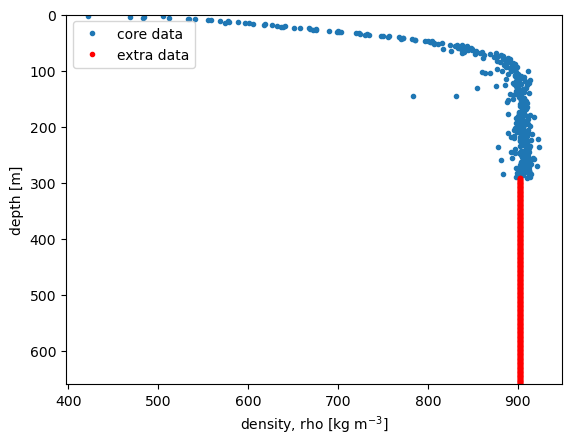

In [21]:
plt.plot(density,depth,'.', label = 'core data');
plt.plot(density_extra,depth_extra,'r.', label = 'extra data');
plt.ylabel('depth [m]')
plt.xlabel('density, rho [kg m$^{-3}$]')
plt.ylim(true_depth, 0);
plt.legend()

Concatenate the core data and our 'extra' data.

In [22]:
density_new = np.concatenate((density, density_extra))
depth_new = np.concatenate((depth, depth_extra))

Plot to make sure we have done the right thing:

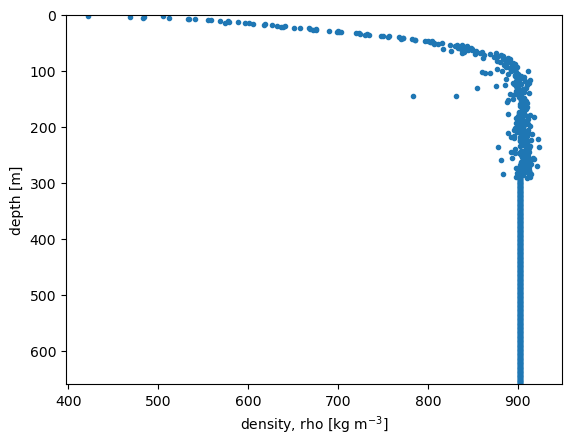

In [23]:
plt.plot(density_new,depth_new,'.');
plt.ylabel('depth [m]')
plt.xlabel('density, rho [kg m$^{-3}$]')
plt.ylim(true_depth, 0);

Finally compute the pressure again using these new data. 

In [24]:
P_new = 0*depth_new   # define an array of zeros equal in length to z

dz_new = np.diff(depth_new)   # the spacing between grid points

P[0]= 0    # the boundary condition (note we could miss this out as we already initalized P as an array of zeros. 

for index in np.arange(start = 1, stop = len(P_new)):  # loop over the column of ice. 
    P_new[index] = P_new[index-1] + dz_new[index-1]*density_new[index-1]*g;

... and compare the result to the pressure you would get if you assumed a density of 918 kg/m^3 throughout.

In [25]:
percentage_error_2 = 100*(rho_i*g*depth_new[-1] - P_new[-1])/P_new[-1]
print(f"This assumption leads to a {percentage_error_2:.1f}% error")

This assumption leads to a 11.6% error
